# **Latar Belakang**

Sebuah perusahaan finansial bergerak di kredit pinjaman kepemilikan rumah. Cakupan area perusahaan ini sudah mencakup area urban, semi-urban, dan rural. Untuk bisa mendapatkan pinjaman, peminjam harus mengajukan permohonan peminjaman terlebih dahulu, lalu perusahaan finansial ini akan melakukan validasi terhadap tiap pengajuan.

## **Problem**

Perusahaan finansial ini ingin mengautomatisasi proses persetujuan pengajuan secara real-time berdasarkan informasi pelanggan yang didapat saat pelanggan mengisi formulir pengajuan secara online. Informasi tersebut di antaranya adalah jenis kelamin, status perkawinan, jenjang pendidikan, jumlah tanggungan, pendapatan, jumlah pinjaman yang diajukan, histori kredit, dan lain sebagainya. 

Untuk dapat mengautomatisasi proses pengajuan, pihak perusahaan perlu mengidentifikasi segment pelanggan yang sekiranya memenuhi syarat untuk dapat diberikan pinjaman. Tugas Anda sebagai data scientist adalah membuat solusi dengan memanfaatkan sample data pelanggan yang diberikan perusahaan dan menggunakan pendekatan machine learning untuk dapat menjawab permasalahan tersebut."	

## **Metrics**
Hipotesa :<br><br>
H0 : Pelanggan tidak layak layak diberi pinjaman.

Ha : Pelanggan layak diberi pinjaman.

---

Asumsi : Pinjaman per orang adalah $ 128,000
         Durasi pinjaman adalah 360 bulan

- FP: Pelanggan sebenarnya tidak layak diberi pinjaman, namun diprediksi layak diberi pinjaman.
Perusahaan berpotensi mengalami kerugian sebesar $415,000 dari pelanggan yang gagal bayar. Ini mencakup:
<br><br>
    - Jumlah pinjaman: $271,581.89.
    - Bunga: $143,581.89.
<br><br>
- FN: Pelanggan sebenarnya layak diberi pinjaman, namun diprediksi tidak layak diberi pinjaman.
Perusahaan berpotensi kehilangan profit dari bunga yang dibayarkan oleh pelanggan sebesar $143,581.89.

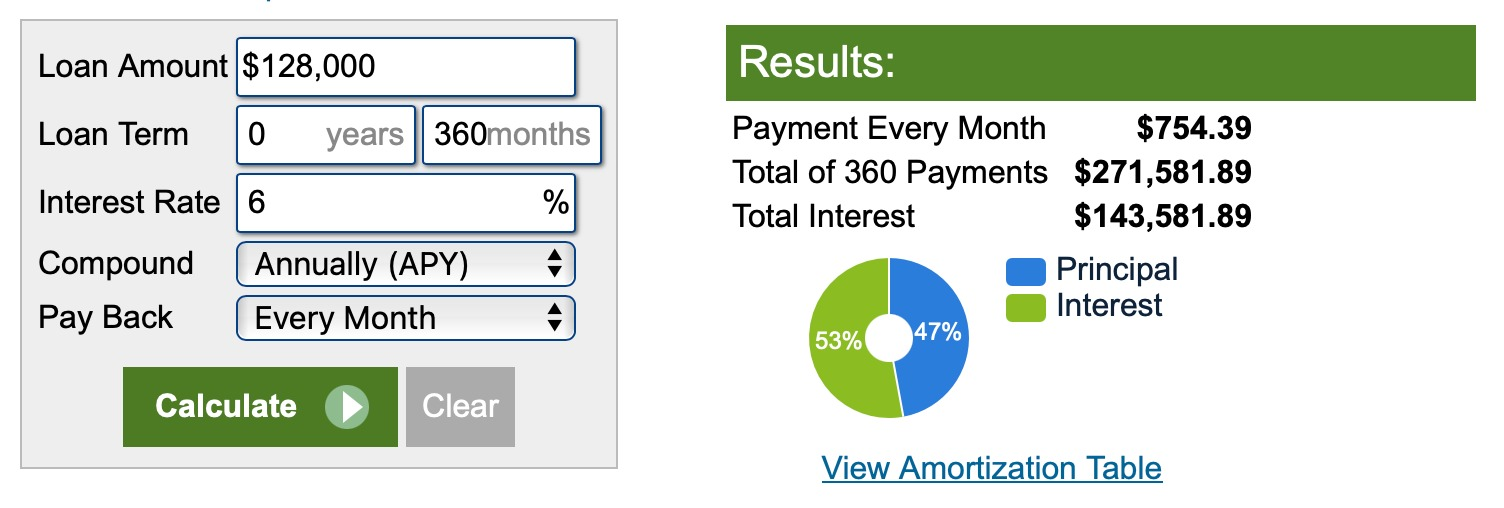

## **Import Packages**

In [161]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline


# cross validation
from sklearn.model_selection import cross_val_score, cross_validate

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## **Load Dataset**

In [162]:
df=pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## **Data Information**

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## **Missing Values**

In [164]:
df.isna().sum()

Loan_ID              0 
Gender               13
Married              3 
Dependents           15
Education            0 
Self_Employed        32
ApplicantIncome      0 
CoapplicantIncome    0 
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area        0 
Loan_Status          0 
dtype: int64

## **Total Pelanggan**

In [165]:
df['Loan_ID'].nunique()

614

In [166]:
df=df.drop(columns='Loan_ID')
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [167]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

/var/folders/yj/b9f3mv7j0bq585tjqs9_xgb00000gn/T/ipykernel_7296/3657208298.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Column Name,Number of Unique,Unique Sample
0,Gender,2,"[Male, Female, nan]"
1,Married,2,"[No, Yes, nan]"
2,Dependents,4,"[0, 1, 2, 3+, nan]"
3,Education,2,"[Graduate, Not Graduate]"
4,Self_Employed,2,"[No, Yes, nan]"
5,ApplicantIncome,505,"[5849, 4583, 3000, 2583, 6000, 5417, 2333, 3036, 4006, 12841, 3200, 2500, 3073, 1853, 1299, 4950, 3596, 3510, 4887, 2600, 7660, 5955, 3365, 3717, 9560, 2799, 4226, 1442, 3750, 4166, 3167, 4692, 3500, 12500, 2275, 1828, 3667, 3748, 3600, 1800, 2400, 3941, 4695, 3410, 5649, 5821, 2645, 4000, 1928, 3086, 4230, 4616, 11500, 2708, 2132, 3366, 8080, 3357, 3029, 2609, 4945, 5726, 10750, 7100, 4300, 3208, 1875, 4755, 5266, 1000, 3333, 3846, 2395, 1378, 3988, 2366, 8566, 5695, 2958, 6250, 3273, 4133, 3620, 6782, 2484, 1977, 4188, 1759, 4288, 4843, 13650, 4652, 3816, 3052, 11417, 7333, 3800, 2071, 5316, 2929, ...]"
6,CoapplicantIncome,287,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, 1526.0, 10968.0, 700.0, 1840.0, 8106.0, 2840.0, 1086.0, 3500.0, 5625.0, 1911.0, 1917.0, 2925.0, 2253.0, 1040.0, 2083.0, 3369.0, 1667.0, 3000.0, 2067.0, 1330.0, 1459.0, 7210.0, 1668.0, 1213.0, 2336.0, 3440.0, 2275.0, 1644.0, 1167.0, 1591.0, 2200.0, 2250.0, 2859.0, 3796.0, 3449.0, 4595.0, 2254.0, 3066.0, 1875.0, 1774.0, 4750.0, 3022.0, 4000.0, 2166.0, 1881.0, 2531.0, 2000.0, 2118.0, 4167.0, 2900.0, 5654.0, 1820.0, 2302.0, 997.0, 3541.0, 3263.0, 3806.0, 3583.0, 754.0, 1030.0, 1126.0, 3600.0, 2333.0, 4114.0, 2283.0, 1398.0, 2142.0, 2667.0, 8980.0, 2014.0, 1640.0, 3850.0, 2569.0, 1929.0, 7750.0, 1430.0, 2034.0, 4486.0, 1425.0, 1666.0, 830.0, 3750.0, 1041.0, 1280.0, 1447.0, 3166.0, 3333.0, 1769.0, 736.0, 1964.0, 1619.0, 11300.0, 1451.0, 7250.0, ...]"
7,LoanAmount,203,"[nan, 128.0, 66.0, 120.0, 141.0, 267.0, 95.0, 158.0, 168.0, 349.0, 70.0, 109.0, 200.0, 114.0, 17.0, 125.0, 100.0, 76.0, 133.0, 115.0, 104.0, 315.0, 116.0, 112.0, 151.0, 191.0, 122.0, 110.0, 35.0, 201.0, 74.0, 106.0, 320.0, 144.0, 184.0, 80.0, 47.0, 75.0, 134.0, 96.0, 88.0, 44.0, 286.0, 97.0, 135.0, 180.0, 99.0, 165.0, 258.0, 126.0, 312.0, 136.0, 172.0, 81.0, 187.0, 113.0, 176.0, 130.0, 111.0, 167.0, 265.0, 50.0, 210.0, 175.0, 131.0, 188.0, 25.0, 137.0, 160.0, 225.0, 216.0, 94.0, 139.0, 152.0, 118.0, 185.0, 154.0, 85.0, 259.0, 194.0, 93.0, 370.0, 182.0, 650.0, 102.0, 290.0, 84.0, 242.0, 129.0, 30.0, 244.0, 600.0, 255.0, 98.0, 275.0, 121.0, 63.0, 700.0, 87.0, 101.0, ...]"
8,Loan_Amount_Term,10,"[360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0, 480.0, 36.0, 84.0, 12.0]"
9,Credit_History,2,"[1.0, 0.0, nan]"


## **Duplicate Values**

In [168]:
df.duplicated().sum()

0

Kolom target (Loan_Status) bernilai Y dan N. Untuk machine learning nilai target harus bernilai numerical antara 0 atau 1. Untuk Y akan diubah menjadi 1 dan N diubah menjadi 0

In [169]:
df['Loan_Status']
df['Loan_Status']=np.where(df['Loan_Status']=='Y',1,0)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


# **EDA**

In [170]:
feat_num = df.describe().columns
feat_num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

## **Descriptive Statistics**

In [171]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


Insights:

1. ApplicantIncome: Rata-rata pendapatan pelanggan sekitar $5,403.45 dengan standar deviasi sekitar 6109.04. Nilai pendapatan pelanggan berkisar antara $150 hingga $81,000.

2. CoapplicantIncome: Rata-rata pendapatan pendamping adalah sekitar $1,621.25 dengan standar deviasi sekitar 2926.25. Nilai pendapatan pendamping berkisar antara $0 hingga $41,667.

3. LoanAmount: Rata-rata jumlah pinjaman adalah sekitar $146,410 dengan standar deviasi sekitar 85.59. Jumlah pinjaman berkisar antara $9,000 hingga $700,000.

4. Loan_Amount_Term: Rata-rata jangka waktu pinjaman adalah sekitar 342 bulan dengan standar deviasi sekitar 65.12. Jangka waktu pinjaman berkisar antara 12 hingga 480 bulan.

## **Data Boxplot**

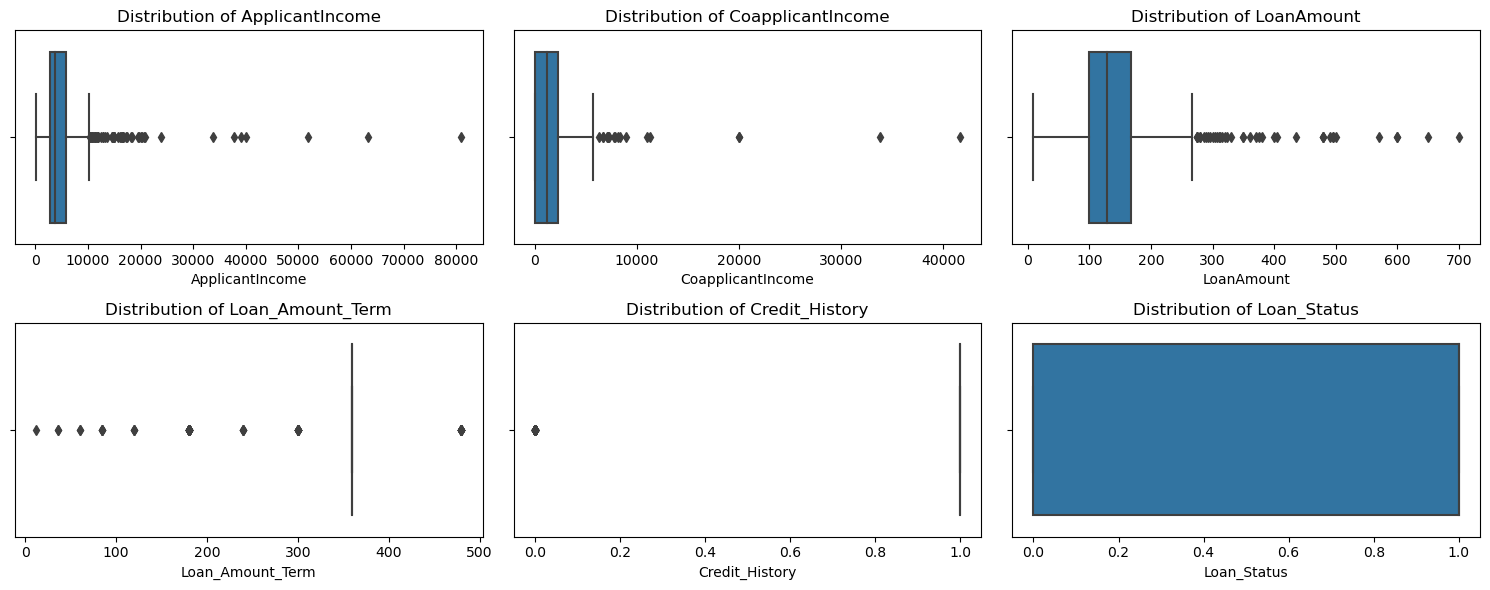

In [172]:
plt.figure(figsize=(15,6))
for i in range(len(feat_num)):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df, x=feat_num[i])
    plt.title('Distribution of ' + feat_num[i])

plt.tight_layout()
plt.show()

## **Data Distribution**

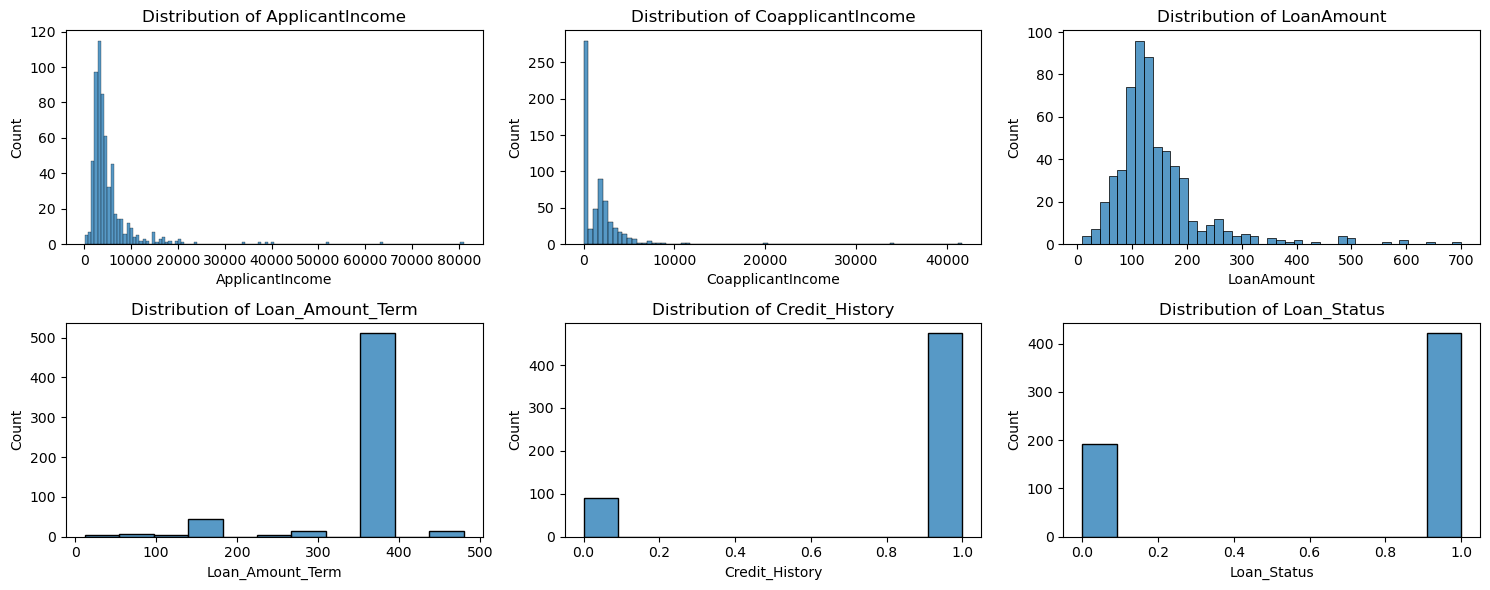

In [173]:
plt.figure(figsize=(15,6))
for i in range(len(feat_num)):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df, x=feat_num[i])
    plt.title('Distribution of ' + feat_num[i])

plt.tight_layout()
plt.show()

Insights:
- Semua kolom numerikal tidak terdistribusi normal, sehingga kita tidak dapat menggunakan rata-rata sebagai estimator, namun menggunakan median.

## **Proportion of Accepted Loan**

In [174]:
feat_cat = df.describe(include='object').columns
feat_cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

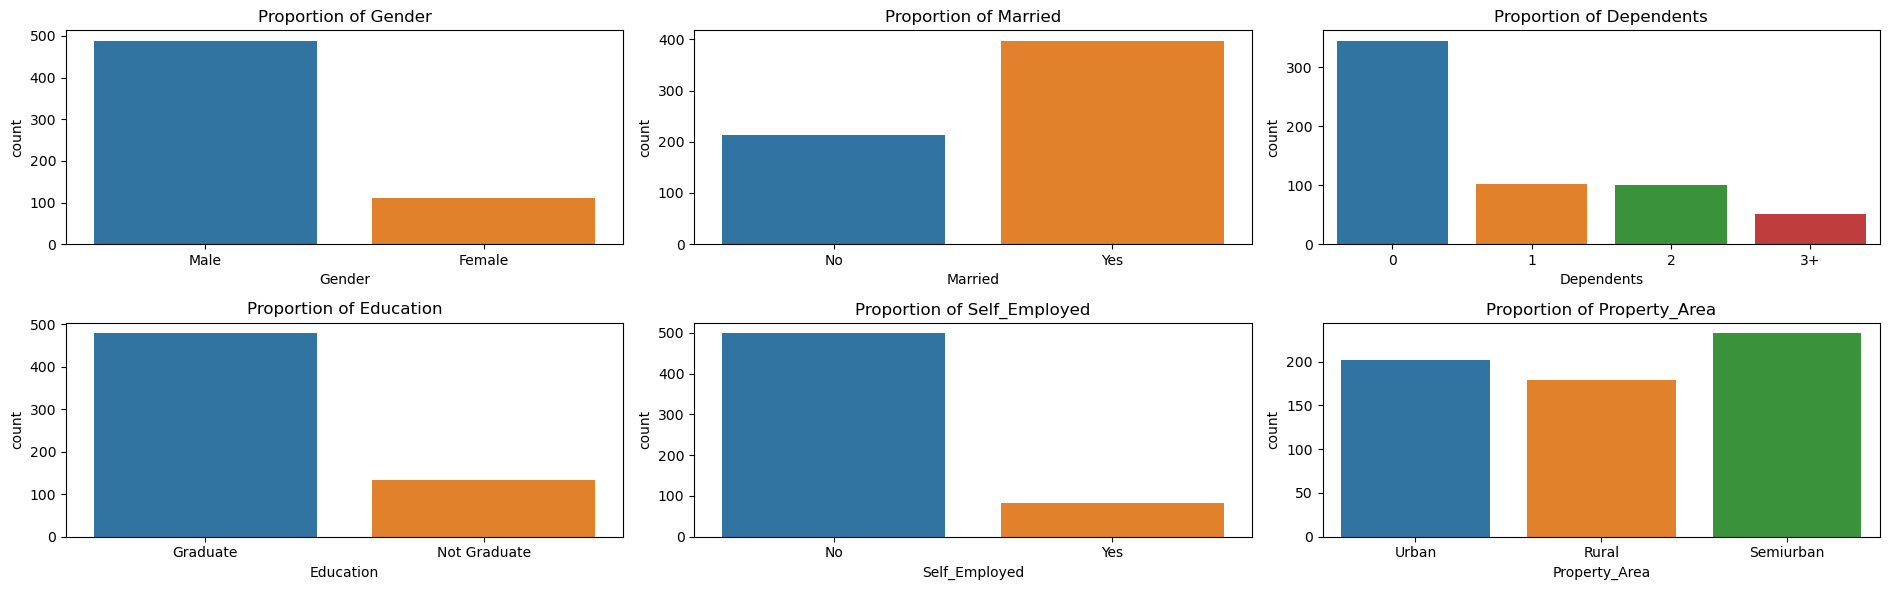

In [175]:
plt.figure(figsize=(19,6))
for i in range(len(feat_cat)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=feat_cat[i])
    plt.title('Proportion of ' + feat_cat[i])
    

plt.tight_layout()
plt.show()

## **Loan Status by Features**

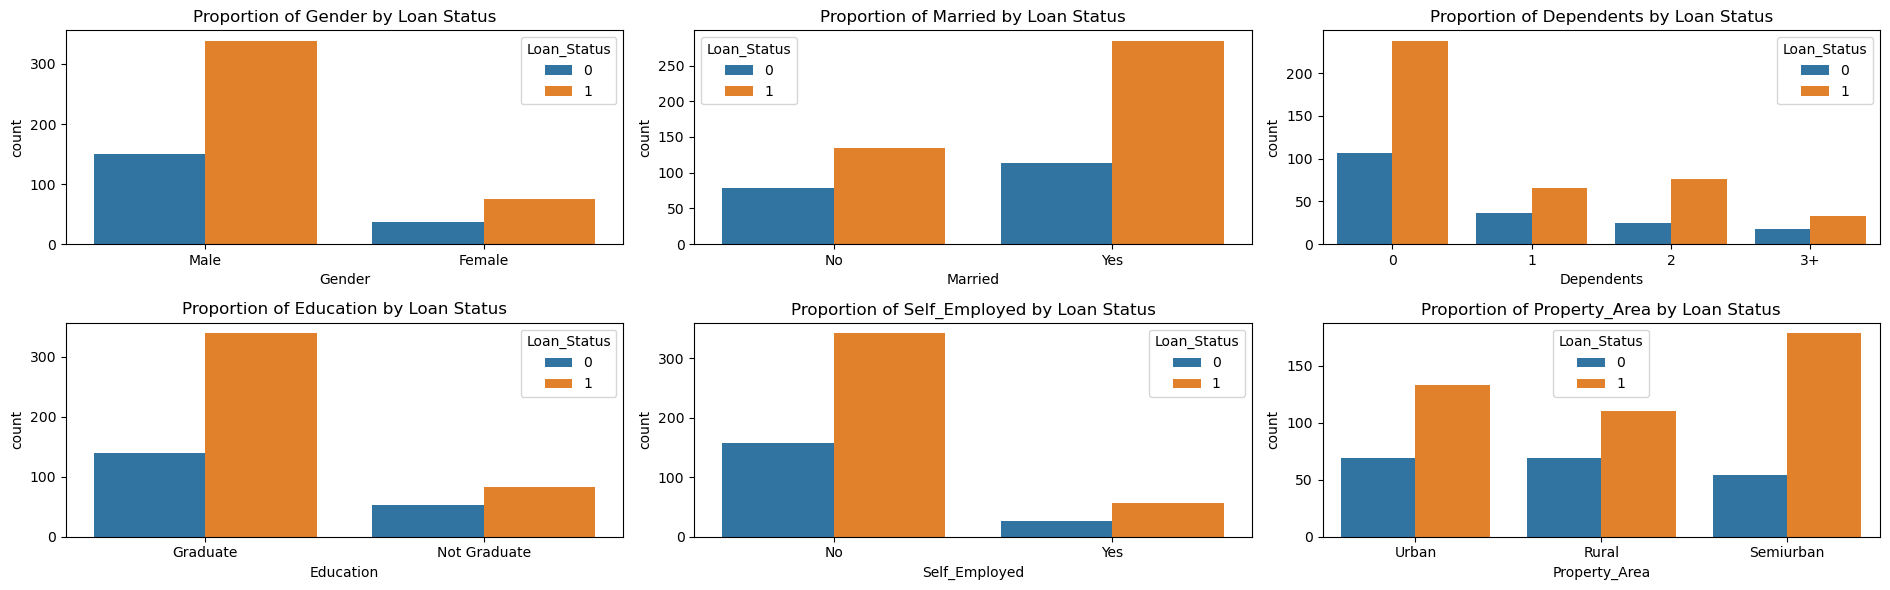

In [176]:
plt.figure(figsize=(19,6))
for i in range(len(feat_cat)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=feat_cat[i], hue='Loan_Status')
    plt.title('Proportion of ' + feat_cat[i] + ' by Loan Status')
    

plt.tight_layout()
plt.show()

# **Define X and y**

Mendefinisikan X (Feature) dan y (Target)

In [177]:
X = df.drop(columns='Loan_Status')
y = df['Loan_Status']

# **Data Splitting**

In [178]:
X_train, X_test, y_train, y_test=train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=0
)

# **Data Preprocessing**

In [179]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [180]:
X.isna().sum()

Gender               13
Married              3 
Dependents           15
Education            0 
Self_Employed        32
ApplicantIncome      0 
CoapplicantIncome    0 
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area        0 
dtype: int64

In [181]:
X.describe().columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

Imputer :
- SimpleImputer Categorical Mode : 'Gender', 'Married', 'Self_Employed', 'Credit_History', 'Dependents'
- IterativeImputer : 'LoanAmount', 'Loan_Amount_Term'

Encoder :
- Onehot : 'Gender', 'Married', 'Self_Employed'
- Ordinal : 'Education', 'Property_Area', 'Dependents'

Scaler :
- RobustScaler : 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History','Education', 'Property_Area', 'Dependents'

In [182]:
X['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [183]:
X['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [184]:
X['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [185]:
# mapping untuk ordinal encoder 
ordinal_mapping = [
    {'col':'Education','mapping': {'Not Graduate':1, 'Graduate':2}},
    {'col':'Property_Area','mapping': {'Rural':1, 'Semiurban':2, 'Urban':3}},
    {'col':'Dependents','mapping': {'0':0, '1':1, '2':2, '3+':3}}  
]

In [186]:
pipe_imp_mode_onehot=Pipeline([
    ('imp_mode', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

pipe_imp_mode_ordinal_robust=Pipeline([
    ('ordinal', OrdinalEncoder(mapping=ordinal_mapping)),
    ('imp_mode', SimpleImputer(strategy='most_frequent')),
    ('robust', RobustScaler())
    
])

pipe_imp_iter_robust=Pipeline([
    ('imp_iter', IterativeImputer()),
    ('robust', RobustScaler())
])



In [187]:
transformer = ColumnTransformer([
    ('pipe_imp_mode_onehot', pipe_imp_mode_onehot,['Gender', 'Married', 'Self_Employed']),
    ('imp_mode', SimpleImputer(strategy='most_frequent'), ['Credit_History']),
    ('pipe_imp_mode_ordinal_robust',pipe_imp_mode_ordinal_robust, ['Education', 'Property_Area', 'Dependents']),
    ('pipe_imp_iter_robust', pipe_imp_iter_robust,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])
],remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_imp_mode_onehot',
                                 Pipeline(steps=[('imp_mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['Gender', 'Married', 'Self_Employed']),
                                ('imp_mode',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Credit_History']),
                                ('pipe_imp_mode_ordinal_robust',
                                 Pipeline(steps=[('ordinal',
                                                  Ord...
                                                                           'data_type': dtype('O'),
                                                                           'mapping': 0     0
1     1
2     2
3+    3
dtype: int64}])),
                                                 ('imp_mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('robust', RobustScaler())]),
                                 ['Education', 'Property_Area', 'Dependents']),
                                ('pipe_imp_iter_robust',
                                 Pipeline(steps=[('imp_iter',
                                                  IterativeImputer()),
                                                 ('robust', RobustScaler())]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term'])])

In [188]:
transformer.fit(X_train)
transformer.transform(X_test)


array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -4.67340067e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         5.42760943e-01,  8.06201550e-01,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -4.67340067e-01, -1.24031008e-01,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         4.22895623e-01,  1.86046512e-01, -1.80000000e+02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         4.65993266e-01,  5.27131783e-01,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         6.54994388e-01, -5.89147287e-01,  0.00000000e+00]])

In [189]:
X_train_df=pd.DataFrame(transformer.transform(X_train))
X_train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.5,0.000000,-0.972784,2.001796,1.364341,0.000000
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.5,2.000000,0.650384,0.171942,-0.434109,0.000000
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,1.141661,-0.467340,-0.682171,0.000000
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.666667,-0.320307,-0.467340,-0.511628,0.000000
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,-1.0,0.0,1.333333,0.806699,0.262177,0.914729,120.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.0,1.0,0.0,1.0,1.0,0.0,1.0,-1.0,-0.5,1.333333,1.344731,-0.467340,0.883721,0.000000
487,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5,1.333333,1.739707,-0.467340,2.015504,0.000000
488,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.0,2.000000,0.328681,-0.467340,-0.511628,-14.944018
489,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.5,0.666667,0.588625,0.098316,0.651163,0.000000


In [190]:
X_test_df=pd.DataFrame(transformer.transform(X_test))
X_test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.5,2.000000,0.659456,-0.467340,0.000000,0.000000
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.5,0.666667,1.488835,0.542761,0.806202,0.000000
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.5,0.000000,1.181786,-0.467340,-0.124031,0.000000
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,-1.0,0.0,1.333333,0.036288,-0.467340,-0.062016,0.000000
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.666667,0.589672,1.548373,-0.899225,-21.747324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.0,1.0,0.0,1.0,1.0,0.0,1.0,-1.0,-0.5,1.333333,-0.073971,0.246465,0.054678,0.000000
119,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.5,0.000000,4.339498,-0.467340,0.992248,0.000000
120,0.0,1.0,0.0,1.0,1.0,0.0,1.0,-1.0,0.5,0.666667,-0.454641,0.422896,0.186047,-180.000000
121,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.666667,-0.126657,0.465993,0.527132,0.000000


# **Cross Validation**

In [191]:
from sklearn.metrics import make_scorer, fbeta_score

In [192]:
# buat scoring f2 score (recall lebih penting dari precision, namun tetap memperhatikan keduanya)
f2 = make_scorer(fbeta_score,beta=2)

# buat scoring f2 score (precision lebih penting dari recall, namun tetap memperhatikan keduanya)
f_setengah = make_scorer(fbeta_score,beta=0.5)

In [193]:
# algoritma
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.ensemble import  RandomForestClassifier      
from xgboost.sklearn import XGBClassifier   
from sklearn.ensemble import VotingClassifier, StackingClassifier


In [194]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier (random_state=0, max_depth=5)
forest = RandomForestClassifier(random_state=0) 
adaboost = AdaBoostClassifier(random_state=0)
gboost = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0)
# voting (ennsemble)
voting = VotingClassifier([
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)
])

# stackin (ensemble)
stacking = StackingClassifier(
    estimators=[
    ('clf1',logreg),
    ('clf2', knn),
    ('clf3', tree)
], final_estimator= knn)


In [195]:
# Pilihan model
models = [logreg, knn, tree, forest, adaboost, gboost, xgboost,voting,stacking] 

cv_mean = []
cv_std = []
cv_all = []


# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for i in models:
    
    model_pipe = Pipeline([
        ('prep', transformer), 
        ('model', i)])
    
    model_cv = cross_val_score(
        model_pipe, 
        X_train, 
        y_train, 
        cv = 5, 
        scoring = f_setengah,
        n_jobs=-1
        )
    
    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())
    cv_all.append(model_cv.round(4))

/Users/acrizkyakbar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/acrizkyakbar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [196]:
df_cv = pd.DataFrame({
    'algo': models,
    'mean': cv_mean,
    'std': cv_std,
    'all': cv_all
})

df_cv.sort_values('mean',ascending=False)

,algo,mean,std,all
0,LogisticRegression(random_state=0),0.822949,0.029234,"[0.8045, 0.8252, 0.7876, 0.8747, 0.8228]"
6,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=0, ...)",0.812954,0.028973,"[0.7759, 0.8158, 0.8047, 0.8646, 0.8038]"
3,RandomForestClassifier(random_state=0),0.812463,0.034726,"[0.7713, 0.8333, 0.7816, 0.8667, 0.8094]"
7,"VotingClassifier(estimators=[('clf1', LogisticRegression(random_state=0)),\n ('clf2', KNeighborsClassifier()),\n ('clf3',\n DecisionTreeClassifier(max_depth=5,\n random_state=0))])",0.811140,0.024787,"[0.7875, 0.8211, 0.7801, 0.8486, 0.8184]"
5,GradientBoostingClassifier(random_state=0),0.810588,0.038621,"[0.7713, 0.8333, 0.7637, 0.8667, 0.8179]"
4,AdaBoostClassifier(random_state=0),0.807864,0.036473,"[0.7632, 0.8203, 0.7862, 0.8707, 0.7989]"
8,"StackingClassifier(estimators=[('clf1', LogisticRegression(random_state=0)),\n ('clf2', KNeighborsClassifier()),\n ('clf3',\n DecisionTreeClassifier(max_depth=5,\n random_state=0))],\n final_estimator=KNeighborsClassifier())",0.804415,0.034425,"[0.7661, 0.8016, 0.7952, 0.8689, 0.7902]"
2,"DecisionTreeClassifier(max_depth=5, random_state=0)",0.789704,0.031688,"[0.7418, 0.8, 0.7816, 0.84, 0.7851]"
1,KNeighborsClassifier(),0.759526,0.007481,"[0.7673, 0.7576, 0.7517, 0.7692, 0.7518]"


Insights:
- Algoritma terbaik adalah Logistic regression dengan std deviation kecil.

# **Hyperparameter Tuning (Logistic Regression)**

In [197]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [198]:
list_resampling = [None,RandomOverSampler(random_state=0), RandomUnderSampler(random_state=0), SMOTE(random_state=0), NearMiss()]

In [199]:
resampling = None

In [200]:
# untuk param_grid
hyperparam = {
    'modeling__penalty': ['l1','l2'],
    'modeling__C': list(np.logspace(-2,2,5,10)),
    'modeling__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'preprocessing__pipe_imp_mode_ordinal_robust__robust' : [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'preprocessing__pipe_imp_iter_robust__robust' : [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'preprocessing__pipe_imp_iter_robust__imp_iter' : [IterativeImputer(), KNNImputer()],
    'resampling' : list_resampling

}

# untuk estimator
pipe_model = Pipeline([
        ('resampling',resampling),
        ('preprocessing', transformer),
        ('modeling', logreg)
    ])

# define gridsearch
gridsearch = GridSearchCV(
    estimator= pipe_model,
    param_grid= hyperparam,
    cv = 5,
    scoring=f_setengah,
    n_jobs= -1
)

In [201]:
gridsearch.fit(X_train,y_train)

/Users/acrizkyakbar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/acrizkyakbar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/acrizkyakbar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/acrizkyakbar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/acrizkyakbar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/acrizkyakbar/anaconda3/

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resampling', None),
                                       ('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_imp_mode_onehot',
                                                                         Pipeline(steps=[('imp_mode',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Self_Employed']),
                                                                        ('imp_mode',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [...
                         'preprocessing__pipe_imp_iter_robust__robust': [MinMaxScaler(),
                                                                         StandardScaler(),
                                                                         RobustScaler()],
                         'preprocessing__pipe_imp_mode_ordinal_robust__robust': [MinMaxScaler(),
                                                                                 StandardScaler(),
                                                                                 RobustScaler()],
                         'resampling': [None, RandomOverSampler(random_state=0),
                                        RandomUnderSampler(random_state=0),
                                        SMOTE(random_state=0), NearMiss()]},
             scoring=make_scorer(fbeta_score, beta=0.5))

In [202]:
# hasil gridsearch

df_grid = pd.DataFrame(gridsearch.cv_results_).sort_values('rank_test_score')
df_grid.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__C,param_modeling__penalty,param_modeling__solver,param_preprocessing__pipe_imp_iter_robust__imp_iter,param_preprocessing__pipe_imp_iter_robust__robust,param_preprocessing__pipe_imp_mode_ordinal_robust__robust,param_resampling,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1246,0.020418,0.006026,0.010101,0.005257,0.1,l1,liblinear,KNNImputer(),RobustScaler(),MinMaxScaler(),RandomOverSampler(random_state=0),"{'modeling__C': 0.1, 'modeling__penalty': 'l1', 'modeling__solver': 'liblinear', 'preprocessing__pipe_imp_iter_robust__imp_iter': KNNImputer(), 'preprocessing__pipe_imp_iter_robust__robust': RobustScaler(), 'preprocessing__pipe_imp_mode_ordinal_robust__robust': MinMaxScaler(), 'resampling': RandomOverSampler(random_state=0)}",0.812500,0.825243,0.787589,0.883905,0.818414,0.825530,0.031836,1
1201,0.029138,0.012027,0.006342,0.002687,0.1,l1,liblinear,IterativeImputer(),RobustScaler(),MinMaxScaler(),RandomOverSampler(random_state=0),"{'modeling__C': 0.1, 'modeling__penalty': 'l1', 'modeling__solver': 'liblinear', 'preprocessing__pipe_imp_iter_robust__imp_iter': IterativeImputer(), 'preprocessing__pipe_imp_iter_robust__robust': RobustScaler(), 'preprocessing__pipe_imp_mode_ordinal_robust__robust': MinMaxScaler(), 'resampling': RandomOverSampler(random_state=0)}",0.804455,0.825243,0.787589,0.880000,0.818414,0.823140,0.031218,2
4135,0.013320,0.002856,0.004224,0.000243,10.0,l2,newton-cholesky,KNNImputer(),RobustScaler(),RobustScaler(),None,"{'modeling__C': 10.0, 'modeling__penalty': 'l2', 'modeling__solver': 'newton-cholesky', 'preprocessing__pipe_imp_iter_robust__imp_iter': KNNImputer(), 'preprocessing__pipe_imp_iter_robust__robust': RobustScaler(), 'preprocessing__pipe_imp_mode_ordinal_robust__robust': RobustScaler(), 'resampling': None}",0.804455,0.825243,0.787589,0.874674,0.822785,0.822949,0.029234,3
5030,0.014358,0.004618,0.004177,0.000170,100.0,l2,liblinear,KNNImputer(),RobustScaler(),StandardScaler(),None,"{'modeling__C': 100.0, 'modeling__penalty': 'l2', 'modeling__solver': 'liblinear', 'preprocessing__pipe_imp_iter_robust__imp_iter': KNNImputer(), 'preprocessing__pipe_imp_iter_robust__robust': RobustScaler(), 'preprocessing__pipe_imp_mode_ordinal_robust__robust': StandardScaler(), 'resampling': None}",0.804455,0.825243,0.787589,0.874674,0.822785,0.822949,0.029234,3
4165,0.019695,0.003441,0.004577,0.001311,10.0,l2,sag,IterativeImputer(),StandardScaler(),RobustScaler(),None,"{'modeling__C': 10.0, 'modeling__penalty': 'l2', 'modeling__solver': 'sag', 'preprocessing__pipe_imp_iter_robust__imp_iter': IterativeImputer(), 'preprocessing__pipe_imp_iter_robust__robust': StandardScaler(), 'preprocessing__pipe_imp_mode_ordinal_robust__robust': RobustScaler(), 'resampling': None}",0.804455,0.825243,0.787589,0.874674,0.822785,0.822949,0.029234,3


In [203]:
gridsearch.best_score_

0.8255303105393071

In [204]:
gridsearch.best_params_

{'modeling__C': 0.1,
 'modeling__penalty': 'l1',
 'modeling__solver': 'liblinear',
 'preprocessing__pipe_imp_iter_robust__imp_iter': KNNImputer(),
 'preprocessing__pipe_imp_iter_robust__robust': RobustScaler(),
 'preprocessing__pipe_imp_mode_ordinal_robust__robust': MinMaxScaler(),
 'resampling': RandomOverSampler(random_state=0)}

## Hyperparameter Tuning (XGB)

In [205]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [206]:
list_resampling = [None,RandomOverSampler(random_state=0), RandomUnderSampler(random_state=0), SMOTE(random_state=0), NearMiss()]

In [207]:
resampling = None

In [208]:
# ?XGBClassifier

In [209]:
# untuk param_grid
hyperparam = {
    'modeling__max_depth': range(5,11),
    'modeling__n_estimators': range(50,200,50),
    'modeling__subsample': np.arange(0.5,1.1,0.2),
    'modeling__colsample_bytree': np.arange(0.5,1.1,0.2),
    'preprocessing__pipe_imp_mode_ordinal_robust__robust' : [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'preprocessing__pipe_imp_iter_robust__robust' : [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'preprocessing__pipe_imp_iter_robust__imp_iter' : [IterativeImputer(), KNNImputer()],
    'resampling' : list_resampling

}

# untuk estimator
pipe_model = Pipeline([
        ('resampling',resampling),
        ('preprocessing', transformer),
        ('modeling', xgboost)
    ])

# define gridsearch
gridsearch_xgb = GridSearchCV(
    estimator= pipe_model,
    param_grid= hyperparam,
    cv = 5,
    scoring=f_setengah,
    n_jobs= -1
)

In [210]:
gridsearch_xgb.fit(X_train,y_train)

/Users/acrizkyakbar/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
85860 fits failed out of a total of 129600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51840 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/acrizkyakbar/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/acrizkyakbar/anaconda3/lib/python3.10/site-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/Users/acrizkyakbar/anaconda3/lib/python3.10/site-packages/imblearn/pipeline.py", line 250, in _fit
    

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resampling', None),
                                       ('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_imp_mode_onehot',
                                                                         Pipeline(steps=[('imp_mode',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Self_Employed']),
                                                                        ('imp_mode',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [...
                         'preprocessing__pipe_imp_iter_robust__robust': [MinMaxScaler(),
                                                                         StandardScaler(),
                                                                         RobustScaler()],
                         'preprocessing__pipe_imp_mode_ordinal_robust__robust': [MinMaxScaler(),
                                                                                 StandardScaler(),
                                                                                 RobustScaler()],
                         'resampling': [None, RandomOverSampler(random_state=0),
                                        RandomUnderSampler(random_state=0),
                                        SMOTE(random_state=0), NearMiss()]},
             scoring=make_scorer(fbeta_score, beta=0.5))

In [211]:
# hasil gridsearch

df_grid_xgb = pd.DataFrame(gridsearch_xgb.cv_results_).sort_values('rank_test_score')
df_grid_xgb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__colsample_bytree,param_modeling__max_depth,param_modeling__n_estimators,param_modeling__subsample,param_preprocessing__pipe_imp_iter_robust__imp_iter,param_preprocessing__pipe_imp_iter_robust__robust,...,param_resampling,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18776,0.068973,0.003384,0.007893,0.002668,0.9,10,100,0.5,KNNImputer(),MinMaxScaler(),...,RandomOverSampler(random_state=0),"{'modeling__colsample_bytree': 0.8999999999999999, 'modeling__max_depth': 10, 'modeling__n_estimators': 100, 'modeling__subsample': 0.5, 'preprocessing__pipe_imp_iter_robust__imp_iter': KNNImputer(), 'preprocessing__pipe_imp_iter_robust__robust': MinMaxScaler(), 'preprocessing__pipe_imp_mode_ordinal_robust__robust': RobustScaler(), 'resampling': RandomOverSampler(random_state=0)}",0.833333,0.851648,0.813953,0.864553,0.812672,0.835232,0.020467,1
18766,0.071663,0.004798,0.008909,0.003324,0.9,10,100,0.5,KNNImputer(),MinMaxScaler(),...,RandomOverSampler(random_state=0),"{'modeling__colsample_bytree': 0.8999999999999999, 'modeling__max_depth': 10, 'modeling__n_estimators': 100, 'modeling__subsample': 0.5, 'preprocessing__pipe_imp_iter_robust__imp_iter': KNNImputer(), 'preprocessing__pipe_imp_iter_robust__robust': MinMaxScaler(), 'preprocessing__pipe_imp_mode_ordinal_robust__robust': MinMaxScaler(), 'resampling': RandomOverSampler(random_state=0)}",0.833333,0.851648,0.813953,0.864553,0.812672,0.835232,0.020467,1
14921,0.097928,0.010534,0.010252,0.004565,0.9,6,150,0.7,KNNImputer(),StandardScaler(),...,RandomOverSampler(random_state=0),"{'modeling__colsample_bytree': 0.8999999999999999, 'modeling__max_depth': 6, 'modeling__n_estimators': 150, 'modeling__subsample': 0.7, 'preprocessing__pipe_imp_iter_robust__imp_iter': KNNImputer(), 'preprocessing__pipe_imp_iter_robust__robust': StandardScaler(), 'preprocessing__pipe_imp_mode_ordinal_robust__robust': RobustScaler(), 'resampling': RandomOverSampler(random_state=0)}",0.828313,0.855978,0.817942,0.850144,0.822102,0.834896,0.015306,3
14911,0.088739,0.007403,0.007347,0.002490,0.9,6,150,0.7,KNNImputer(),StandardScaler(),...,RandomOverSampler(random_state=0),"{'modeling__colsample_bytree': 0.8999999999999999, 'modeling__max_depth': 6, 'modeling__n_estimators': 150, 'modeling__subsample': 0.7, 'preprocessing__pipe_imp_iter_robust__imp_iter': KNNImputer(), 'preprocessing__pipe_imp_iter_robust__robust': StandardScaler(), 'preprocessing__pipe_imp_mode_ordinal_robust__robust': MinMaxScaler(), 'resampling': RandomOverSampler(random_state=0)}",0.828313,0.855978,0.817942,0.850144,0.822102,0.834896,0.015306,3
14916,0.100833,0.000668,0.009387,0.003901,0.9,6,150,0.7,KNNImputer(),StandardScaler(),...,RandomOverSampler(random_state=0),"{'modeling__colsample_bytree': 0.8999999999999999, 'modeling__max_depth': 6, 'modeling__n_estimators': 150, 'modeling__subsample': 0.7, 'preprocessing__pipe_imp_iter_robust__imp_iter': KNNImputer(), 'preprocessing__pipe_imp_iter_robust__robust': StandardScaler(), 'preprocessing__pipe_imp_mode_ordinal_robust__robust': StandardScaler(), 'resampling': RandomOverSampler(random_state=0)}",0.828313,0.855978,0.817942,0.850144,0.822102,0.834896,0.015306,3


In [212]:
gridsearch_xgb.best_score_

0.8352321327566712

- Hasil gridsearch_xgb.best_score_ sebesar 0.8352 menunjukkan skor validasi terbaik yang dicapai saat proses hyperparameter tuning menggunakan Grid Search dengan XGBoost.

In [213]:
gridsearch_xgb.best_params_

{'modeling__colsample_bytree': 0.8999999999999999,
 'modeling__max_depth': 10,
 'modeling__n_estimators': 100,
 'modeling__subsample': 0.5,
 'preprocessing__pipe_imp_iter_robust__imp_iter': KNNImputer(),
 'preprocessing__pipe_imp_iter_robust__robust': MinMaxScaler(),
 'preprocessing__pipe_imp_mode_ordinal_robust__robust': MinMaxScaler(),
 'resampling': RandomOverSampler(random_state=0)}

Hasil dari `gridsearch_xgb.best_params_` menunjukkan kombinasi terbaik dari hyperparameter yang ditemukan selama proses tuning menggunakan Grid Search dengan XGBoost. Interpretasi singkat dari setiap parameter:

1. `modeling__colsample_bytree`: Parameter ini menentukan persentase fitur yang akan digunakan dalam setiap pohon dalam XGBoost. Nilai terbaik yang ditemukan adalah 0.9, yang berarti sekitar 90% fitur akan digunakan dalam setiap pohon.

2. `modeling__max_depth`: Parameter ini mengontrol kedalaman maksimum dari setiap pohon dalam XGBoost. Nilai terbaik yang ditemukan adalah 10, yang berarti setiap pohon akan memiliki kedalaman maksimum 10.

3. `modeling__n_estimators`: Parameter ini menentukan jumlah pohon yang akan dibangun dalam XGBoost. Nilai terbaik yang ditemukan adalah 100, yang berarti akan ada 100 pohon yang dibangun.

4. `modeling__subsample`: Parameter ini mengontrol persentase sampel yang akan digunakan untuk melatih setiap pohon dalam XGBoost. Nilai terbaik yang ditemukan adalah 0.5, yang berarti sekitar 50% dari total sampel akan digunakan dalam setiap pohon.

5. `preprocessing__pipe_imp_iter_robust__imp_iter`: Parameter ini menunjukkan metode imputer yang digunakan dalam tahap pre-processing. Dalam hal ini, KNNImputer (K-Nearest Neighbors Imputer) dipilih sebagai metode imputer terbaik.

6. `preprocessing__pipe_imp_iter_robust__robust`: Parameter ini menunjukkan metode skala yang digunakan dalam tahap pre-processing untuk fitur-fitur numerik. MinMaxScaler dipilih sebagai metode scaler terbaik.

7. `preprocessing__pipe_imp_mode_ordinal_robust__robust`: Parameter ini menunjukkan metode scaler yang digunakan dalam tahap pre-processing untuk fitur-fitur ordinal. MinMaxScaler dipilih sebagai metode scaler terbaik.

8. `resampling`: Parameter ini menunjukkan metode resampling yang digunakan untuk menangani ketidakseimbangan kelas. Dalam hal ini, RandomOverSampler dengan random_state=0 dipilih sebagai metode resampling terbaik.

Interpretasi singkat dari hasil ini adalah bahwa model XGBoost dengan kombinasi hiperparameter seperti di atas, menggunakan metode imputasi KNN, skala MinMaxScaler, dan resampling dengan RandomOverSampler, memberikan performa terbaik yang ditemukan selama tuning untuk dataset yang digunakan.

In [214]:
df_cv.sort_values('mean', ascending=False)

,algo,mean,std,all
0,LogisticRegression(random_state=0),0.822949,0.029234,"[0.8045, 0.8252, 0.7876, 0.8747, 0.8228]"
6,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=0, ...)",0.812954,0.028973,"[0.7759, 0.8158, 0.8047, 0.8646, 0.8038]"
3,RandomForestClassifier(random_state=0),0.812463,0.034726,"[0.7713, 0.8333, 0.7816, 0.8667, 0.8094]"
7,"VotingClassifier(estimators=[('clf1', LogisticRegression(random_state=0)),\n ('clf2', KNeighborsClassifier()),\n ('clf3',\n DecisionTreeClassifier(max_depth=5,\n random_state=0))])",0.811140,0.024787,"[0.7875, 0.8211, 0.7801, 0.8486, 0.8184]"
5,GradientBoostingClassifier(random_state=0),0.810588,0.038621,"[0.7713, 0.8333, 0.7637, 0.8667, 0.8179]"
4,AdaBoostClassifier(random_state=0),0.807864,0.036473,"[0.7632, 0.8203, 0.7862, 0.8707, 0.7989]"
8,"StackingClassifier(estimators=[('clf1', LogisticRegression(random_state=0)),\n ('clf2', KNeighborsClassifier()),\n ('clf3',\n DecisionTreeClassifier(max_depth=5,\n random_state=0))],\n final_estimator=KNeighborsClassifier())",0.804415,0.034425,"[0.7661, 0.8016, 0.7952, 0.8689, 0.7902]"
2,"DecisionTreeClassifier(max_depth=5, random_state=0)",0.789704,0.031688,"[0.7418, 0.8, 0.7816, 0.84, 0.7851]"
1,KNeighborsClassifier(),0.759526,0.007481,"[0.7673, 0.7576, 0.7517, 0.7692, 0.7518]"


In [215]:
print('mean f_setengah sebelum tuning dengan logistic regression: ', df_cv.loc[6, 'mean'].round(3))
print('std f_setengah sebelum tuning dengan logistic regression: ', df_cv.loc[6, 'std'].round(3))
print()
print('mean f_setengah setelah tuning dengan XGB Classifier: ', gridsearch.best_score_.round(3))
print('std f_setengah sebelum tuning dengan XGB Classifier: ', df_grid.iloc[0, -2].round(3))
print()
print('mean f_setengah setelah tuning dengan XGB Classifier: ', gridsearch_xgb.best_score_.round(3))
print('std f_setengah sebelum tuning dengan XGB Classifier: ', df_grid_xgb.iloc[0, -2].round(3))

mean f_setengah sebelum tuning dengan logistic regression:  0.813
std f_setengah sebelum tuning dengan logistic regression:  0.029

mean f_setengah setelah tuning dengan XGB Classifier:  0.826
std f_setengah sebelum tuning dengan XGB Classifier:  0.032

mean f_setengah setelah tuning dengan XGB Classifier:  0.835
std f_setengah sebelum tuning dengan XGB Classifier:  0.02


**Nilai Precision terbaik menggunakan algoritma XGB Classifier, maka akan digunakan model dengan algoritma XGB Classifier untuk memprekdisi Test set**

# **Predict to Test set**

**Sebelum tuning**

In [216]:
from sklearn.metrics import precision_score

In [217]:
model_before_tuning = xgboost

# Model
pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model_before_tuning)
    ])

# Model training
pipe_model.fit(X_train, y_train)

# Model predicting test set  
y_pred_benchmark = pipe_model.predict(X_test)

fbeta_score(y_test, y_pred_benchmark,beta=0.5)


0.8123569794050343

**Setelah tuning**

In [218]:
model_after_tuning = gridsearch_xgb.best_estimator_


# Model training
model_after_tuning.fit(X_train, y_train)

# Model predicting test set  
y_pred_xgb = model_after_tuning.predict(X_test)

fbeta_score(y_test, y_pred_xgb,beta=0.5)


0.8153477218225418

Insights:

Dalam percobaan pertama sebelum hyperparameter tuning, model XGBoost dengan pengaturan default (model_before_tuning) digunakan untuk melatih dan menguji data. Hasil fbeta_score yang diperoleh sebesar 0.8123 menunjukkan tingkat akurasi yang relatif baik pada data uji.

Namun, dalam percobaan kedua setelah hyperparameter tuning menggunakan Grid Search (model_after_tuning), model XGBoost dengan hyperparameter terbaik yang ditemukan, digunakan untuk melatih dan menguji data. Hasil fbeta_score yang diperoleh sebesar 0.8153 menunjukkan adanya peningkatan sedikit dalam kinerja model setelah penalaan.

Dengan demikian, setelah melakukan hyperparameter tuning menggunakan Grid Search, model XGBoost menghasilkan sedikit peningkatan dalam kemampuan prediksi pada data uji, dengan nilai fbeta_score yang lebih tinggi dibandingkan dengan model sebelum tuning.

# **Other Metrics**

In [219]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay

## **Confusion Matrix**

### **Before Tuning**

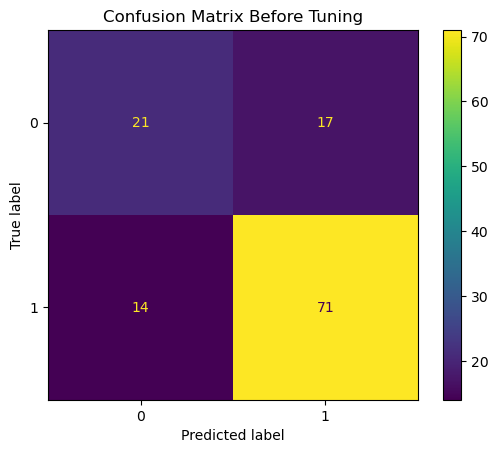

In [220]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test,y_pred_benchmark)
).plot()
plt.title('Confusion Matrix Before Tuning');

Insights:

- True Positive (TP): Ada 71 prediksi yang benar diklasifikasikan sebagai kelas positif.
- True Negative (TN): Ada 21 prediksi yang benar diklasifikasikan sebagai kelas negatif.
- False Positive (FP): Ada 17 prediksi yang salah diklasifikasikan sebagai kelas positif.
- False Negative (FN): Ada 14 prediksi yang salah diklasifikasikan sebagai kelas negatif.

Dari confusion matrix tersebut, dapat ditarik beberapa kesimpulan:

- Dengan proporsi threshold 50:50 menggunakan XGBoost base model, model berhasil mengklasifikasikan 71 sampel sebagai kelas positif yang benar dan 21 sampel sebagai kelas negatif yang benar.

- Model salah mengklasifikasikan 17 sampel sebagai kelas positif padahal seharusnya kelas negatif.

- Model juga salah mengklasifikasikan 14 sampel sebagai kelas negatif padahal seharusnya kelas positif.

In [221]:
# predict probabilities
y_pred_proba_before = pipe_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
y_pred_proba_before = y_pred_proba_before[:, 1]

# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_before)

In [222]:
df_pr_curve_before = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'thresholds': list(thresholds) + [0]
}).sort_values('precision', ascending=False)

df_pr_curve_before.sort_values(['precision','recall'], ascending=[False,False])

,precision,recall,thresholds
119,1.000000,0.047059,0.997794
120,1.000000,0.035294,0.998032
121,1.000000,0.023529,0.998116
122,1.000000,0.011765,0.998659
123,1.000000,0.000000,0.000000
...,...,...,...
4,0.714286,1.000000,0.009094
3,0.708333,1.000000,0.005947
2,0.702479,1.000000,0.002773
1,0.696721,1.000000,0.001549


''

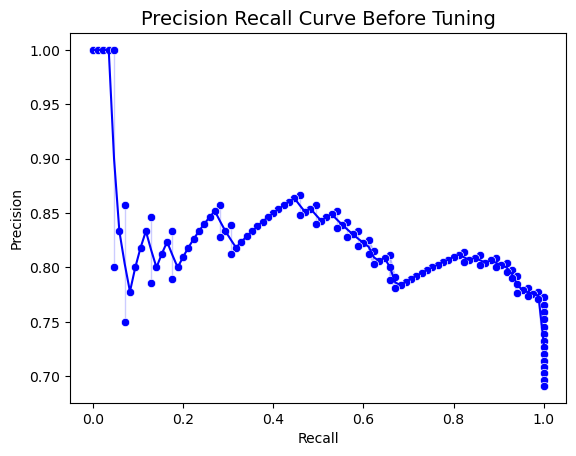

In [223]:
# Cara buat Precision Recall Curve manual

sns.lineplot(data=df_pr_curve_before, x='recall', y='precision', color='b')
sns.scatterplot(data=df_pr_curve_before, x='recall', y='precision', color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve Before Tuning', size=14)
;

In [224]:
confusion_matrix(y_test,np.where(y_pred_proba_before > 0.5, 1, 0))

array([[21, 17],
       [14, 71]])

In [225]:
list_potential_loss_before =[]

list_i = []

i=0.01
while i <= 1.01:
    hasil = 0
    y_dummy=np.where(y_pred_proba_before > i, 1, 0)
    hasil = (confusion_matrix(y_test,y_dummy)[0][1]*415)                           # False Positive
    hasil = hasil + (confusion_matrix(y_test,y_dummy)[1][0]*144)                   # False Negative

    list_i.append(i)
    list_potential_loss_before.append(hasil)
    i=i+0.01

In [226]:
df_potential_loss_before = pd.DataFrame()
df_potential_loss_before['threshold']=list_i
df_potential_loss_before['potential_loss']=list_potential_loss_before

# df_recall['recall']=list_recall_score
# df_recall['precision']=list_precision_score

df_potential_loss_before=df_potential_loss_before.sort_values('potential_loss',ascending=True)
df_potential_loss_before.head()

,threshold,potential_loss
37,0.38,8766
38,0.39,8766
45,0.46,8783
53,0.54,8800
54,0.55,8800


- Potensi kerugian terkecil sebelum tuning adalah $8,766 dengan threshold 0.38.

### **After Tuning**

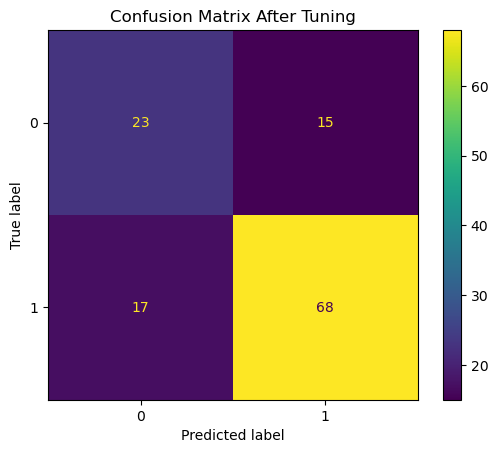

In [227]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test,y_pred_xgb)
).plot()
plt.title('Confusion Matrix After Tuning');

Insights:

- True Positive (TP): Ada 68 prediksi yang benar diklasifikasikan sebagai kelas positif.
- True Negative (TN): Ada 23 prediksi yang benar diklasifikasikan sebagai kelas negatif.
- False Positive (FP): Ada 15 prediksi yang salah diklasifikasikan sebagai kelas positif.
- False Negative (FN): Ada 17 prediksi yang salah diklasifikasikan sebagai kelas negatif.

Dari confusion matrix tersebut, dapat ditarik beberapa kesimpulan:

- Dengan proporsi threshold 50:50 menggunakan XGBoost yang sudah dituning, model berhasil mengklasifikasikan 68 sampel sebagai kelas positif yang benar dan 23 sampel sebagai kelas negatif yang benar.
- Model salah mengklasifikasikan 15 sampel sebagai kelas positif padahal seharusnya kelas negatif.
- Model juga salah mengklasifikasikan 17 sampel sebagai kelas negatif padahal seharusnya kelas positif.



In [228]:
model_after_tuning.predict_proba(X_test)[:,1]

array([0.86001563, 0.8906502 , 0.88894475, 0.96375316, 0.9186772 ,
       0.9985934 , 0.01529564, 0.98759216, 0.05751855, 0.9711573 ,
       0.8399032 , 0.26597375, 0.9318788 , 0.92607695, 0.98612785,
       0.85392183, 0.5244722 , 0.9776177 , 0.8784155 , 0.8061801 ,
       0.59128594, 0.08347544, 0.5387885 , 0.9742448 , 0.38207397,
       0.12780052, 0.01780737, 0.9439332 , 0.08492105, 0.9877264 ,
       0.95116645, 0.05843624, 0.88288635, 0.98265195, 0.27983898,
       0.6624864 , 0.9956333 , 0.05700896, 0.35707814, 0.9468926 ,
       0.9740897 , 0.959041  , 0.99693525, 0.89670575, 0.00708306,
       0.08874192, 0.8244195 , 0.19073512, 0.1814713 , 0.9934127 ,
       0.97738546, 0.0240458 , 0.05445221, 0.9495453 , 0.8299829 ,
       0.9395238 , 0.9791114 , 0.8162835 , 0.07221334, 0.54910034,
       0.65738225, 0.00167147, 0.92268926, 0.9480799 , 0.9939433 ,
       0.9971643 , 0.99713945, 0.02528339, 0.98460835, 0.9770223 ,
       0.99309266, 0.03525731, 0.15477628, 0.87512   , 0.98973

In [229]:
# predict probabilities
y_pred_proba_after = model_after_tuning.predict_proba(X_test)

# keep probabilities for the positive outcome only
y_pred_proba_after = y_pred_proba_after[:, 1]

# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_after)

In [230]:
df_pr_curve_after = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'thresholds': list(thresholds) + [0]
}).sort_values('precision', ascending=False)

df_pr_curve_after.sort_values(['precision','recall'], ascending=[False,False])

,precision,recall,thresholds
117,1.000000,0.070588,0.996935
118,1.000000,0.058824,0.997139
119,1.000000,0.047059,0.997164
120,1.000000,0.035294,0.997943
121,1.000000,0.023529,0.998593
...,...,...,...
4,0.705882,0.988235,0.017807
3,0.700000,0.988235,0.015296
1,0.696721,1.000000,0.005353
2,0.694215,0.988235,0.007083


''

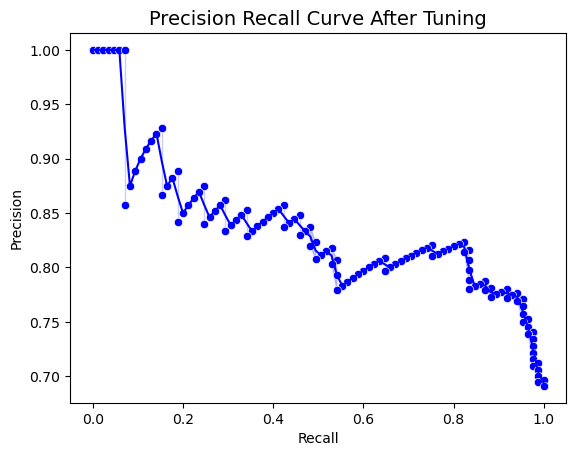

In [231]:
sns.lineplot(data=df_pr_curve_after, x='recall', y='precision', color='b')
sns.scatterplot(data=df_pr_curve_after, x='recall', y='precision', color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve After Tuning', size=14)
;

In [232]:
list_potential_loss =[]

list_i = []

i=0.01
while i <= 1.01:
    hasil = 0
    y_dummy=np.where(y_pred_proba_after > i, 1, 0)
    hasil = (confusion_matrix(y_test,y_dummy)[0][1]*415)                           # False Positive
    hasil = hasil + (confusion_matrix(y_test,y_dummy)[1][0]*144)                   # False Negative

    list_i.append(i)
    list_potential_loss.append(hasil)
    i=i+0.01

In [233]:
df_potential_loss_after = pd.DataFrame()
df_potential_loss_after['threshold']=list_i
df_potential_loss_after['potential_loss']=list_potential_loss

# df_recall['recall']=list_recall_score
# df_recall['precision']=list_precision_score


df_potential_loss_after=df_potential_loss_after.sort_values('potential_loss',ascending=True)

In [234]:
display(df_potential_loss_before.head(1),df_potential_loss_after.head(1))

,threshold,potential_loss
37,0.38,8766


,threshold,potential_loss
36,0.37,8385


- Setelah tuning potensi kerugian turun menjadi $8,385 dari $8,766 dengan best threshold 0.37.

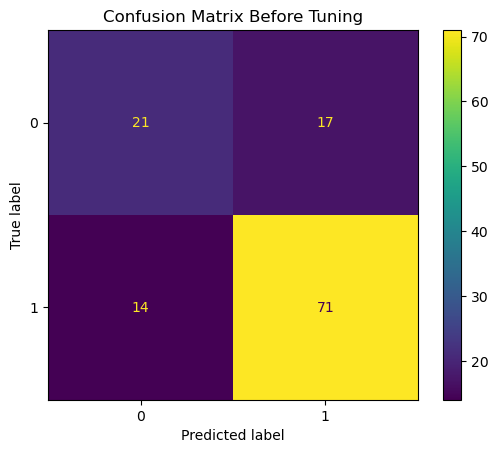

In [235]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test,y_pred_benchmark)
).plot()
plt.title('Confusion Matrix Before Tuning');

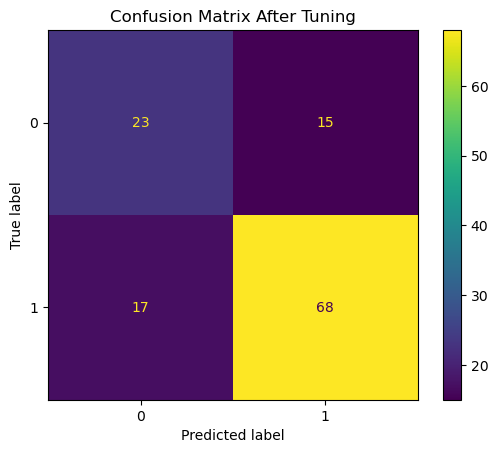

In [236]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test,y_pred_xgb)
).plot()
plt.title('Confusion Matrix After Tuning');

- Jumlah FP juga turun menjadi 15, dari jumlah awal 17.
- Ini membuktikan model dengan tuning dapat menekan jumlah FP.

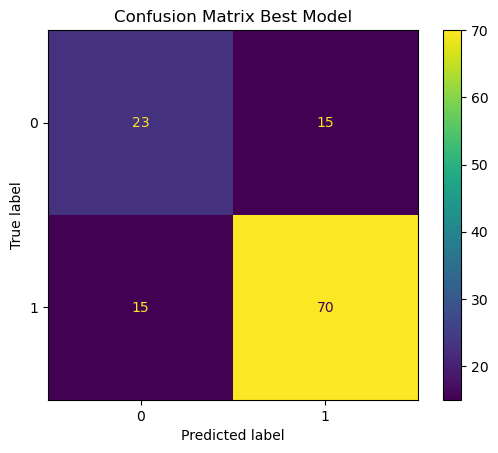

In [247]:
# y_dummy=np.where(y_pred_proba_after > i, 1, 0)
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test,np.where(y_pred_proba_after > 0.37, 1, 0))
).plot()
plt.title('Confusion Matrix Best Model');

Insights:
- Dengan menggunakan threshold 0.37. Model mampu menurunkan jumlah FN yang awalnya 17 menjadi 15. Membuktikan threshold 0.37 lebih baik dari pada 0.50.

## **Feature Importance**

In [238]:
importance_scores = model_after_tuning[2].feature_importances_
importance_scores

array([0.05906391, 0.        , 0.04840008, 0.01404247, 0.06643916,
       0.0447831 , 0.43125552, 0.05818777, 0.03635151, 0.03470983,
       0.04851114, 0.0496133 , 0.04553337, 0.06310876], dtype=float32)

In [239]:
model_after_tuning[1]

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_imp_mode_onehot',
                                 Pipeline(steps=[('imp_mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['Gender', 'Married', 'Self_Employed']),
                                ('imp_mode',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Credit_History']),
                                ('pipe_imp_mode_ordinal_robust',
                                 Pipeline(steps=[('ordinal',
                                                  Ord...
                                                                           'data_type': dtype('O'),
                                                                           'mapping': 0     0
1     1
2     2
3+    3
dtype: int64}])),
                                                 ('imp_mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('robust', MinMaxScaler())]),
                                 ['Education', 'Property_Area', 'Dependents']),
                                ('pipe_imp_iter_robust',
                                 Pipeline(steps=[('imp_iter', KNNImputer()),
                                                 ('robust', MinMaxScaler())]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term'])])

In [240]:
kolom_pipe_1=model_after_tuning[1].transformers_[0][1].get_feature_names_out()
kolom_pipe_1

array(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Self_Employed_No', 'Self_Employed_Yes'], dtype=object)

In [241]:
kolom_pipe_2=model_after_tuning[1].transformers_[1][1].get_feature_names_out()
kolom_pipe_2

array(['Credit_History'], dtype=object)

In [242]:
kolom_pipe_3=model_after_tuning[1].transformers_[2][1][1].get_feature_names_out()
kolom_pipe_3

array(['Education', 'Property_Area', 'Dependents'], dtype=object)

In [243]:
kolom_pipe_4=model_after_tuning[1].transformers_[3][1].get_feature_names_out()
kolom_pipe_4

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'], dtype=object)

In [244]:
# menggabungkan nama feature

all_features = list(kolom_pipe_1)+list(kolom_pipe_2)+list(kolom_pipe_3)+list(kolom_pipe_4)
all_features

['Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Credit_History',
 'Education',
 'Property_Area',
 'Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term']

In [245]:
df_feat_importance = pd.DataFrame()
df_feat_importance['feature'] = all_features
df_feat_importance['importance'] = importance_scores
df_feat_importance=df_feat_importance.sort_values('importance', ascending=False)
df_feat_importance

,feature,importance
6,Credit_History,0.431256
4,Self_Employed_No,0.066439
13,Loan_Amount_Term,0.063109
0,Gender_Female,0.059064
7,Education,0.058188
11,CoapplicantIncome,0.049613
10,ApplicantIncome,0.048511
2,Married_No,0.048400
12,LoanAmount,0.045533
5,Self_Employed_Yes,0.044783


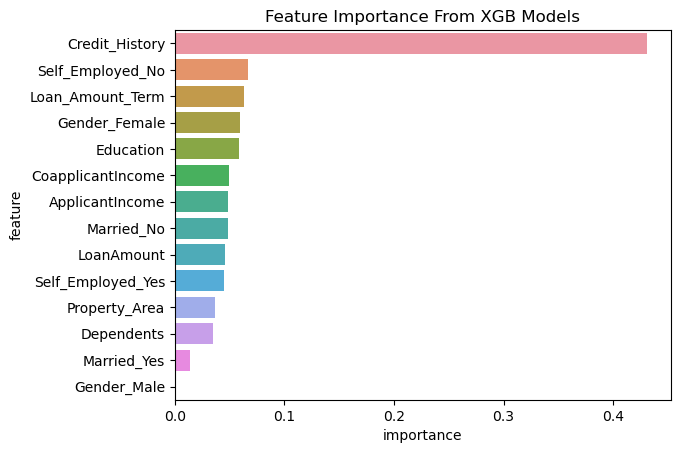

In [246]:
sns.barplot(
    data=df_feat_importance,
    x='importance',
    y='feature'
)
plt.title('Feature Importance From XGB Models')
plt.show()

Insights:

Tabel "feature importance" menampilkan tingkat pentingnya setiap fitur dalam model. Interpretasi singkat dari tabel:

1. Fitur yang paling penting dalam model adalah "Credit_History" dengan nilai penting sebesar 0.431256. Ini menunjukkan bahwa fitur "Credit_History" memiliki kontribusi paling signifikan dalam mempengaruhi prediksi hasil model. Perubahan dalam fitur ini akan memiliki dampak yang besar terhadap prediksi yang dihasilkan oleh model.

2. Fitur-fitur lain yang juga memiliki kontribusi yang cukup tinggi dalam model adalah "Self_Employed_No", "Loan_Amount_Term", dan "Gender_Female" dengan nilai penting masing-masing sekitar 0.06. Hal ini menunjukkan bahwa fitur-fitur tersebut memiliki pengaruh yang signifikan terhadap hasil prediksi.

3. Fitur seperti "Education", "CoapplicantIncome", "ApplicantIncome", "Married_No", "LoanAmount", dan "Self_Employed_Yes" juga memiliki tingkat penting yang cukup tinggi dengan nilai penting antara 0.04 hingga 0.05. Fitur-fitur ini juga berkontribusi dalam mempengaruhi hasil prediksi model.

4. Fitur "Property_Area", "Dependents", "Married_Yes", dan "Gender_Male" memiliki tingkat penting yang lebih rendah dibandingkan dengan fitur-fitur lainnya. Nilai penting yang lebih rendah menunjukkan bahwa fitur-fitur ini memiliki pengaruh yang relatif lebih kecil terhadap prediksi model.

5. Fitur "Gender_Male" memiliki nilai penting 0.0, yang menunjukkan bahwa fitur ini tidak memberikan kontribusi apa pun dalam model dan mungkin bisa dihapus dari model karena tidak memberikan informasi yang berguna untuk prediksi.

Interpretasi singkat dari tabel "feature importance" ini membantu untuk memahami peran relatif setiap fitur dalam model dan memperoleh wawasan tentang faktor-faktor yang paling berpengaruh dalam melakukan prediksi.

# **Conclusion**

Dengan menekan jumlah FP tentunya akan muncul tradeoff dengan meningkatnya jumlah FN. Dalam bisnis ini, FN berpotensi untuk mengurangi jumlah profit yang akan dihasilkan oleh perusahaan. Oleh karena itu penting bagi perusahaan untuk melakukan analisis lebih dalam untuk calon pelanggan yang diprediksi sebagai FN, sehingga perusahaan tidak hanya mampu untuk mengelola resiko lebih baik namun disisi lain juga mampu meningkatkan jumlah profit.

# **Recommendations**

Dalam permasalahan ini, mengelola resiko jauh lebih baik daripada meningkatkan potensi profit. Karena kerugian yang muncul dari kesalahan prediksi pelangggan yang sebenarnya tidak layak diberi pinjaman jauh lebih besar. Selain itu kita sudah mengetahui bahwa credit history dari seorang pelanggan adalah fitur yg signifikan untuk menentukan apakah pelanggan tersebut layak atau tidak untuk diberi pinjaman, oleh karena itu penting bagi perusahaan untuk memperhatikan dan membuat fitur ini menjadi lebih detail untuk kedepannya, contohnya berapa kali mereka pernah diberi pinjaman, bagaimana historis pinjaman mereka, dll.